<a href="https://colab.research.google.com/github/dhanushkumar-amk/E-WASTE-SORTING-CLASSIFIER-USING-KNN/blob/main/Ewaste_sorthing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN E-WASTE CLASSIFICATION - STEP BY STEP
DATASET (20 Records):
 Weight_g  Plastic_Ratio  Device_Type  Category
      120           0.80        Phone Hazardous
      450           0.60       Tablet  Reusable
       80           0.90      Charger   Recycle
      200           0.30      Battery Hazardous
       50           0.95 Plastic_Case   Recycle
      300           0.50 Small_Device  Reusable
       95           0.85      Charger   Recycle
      180           0.40        Phone Hazardous
       75           0.90      Charger   Recycle
      250           0.70       Tablet  Reusable
      130           0.75        Phone Hazardous
      400           0.65       Tablet  Reusable
       85           0.88      Charger   Recycle
      220           0.35      Battery Hazardous
       60           0.92 Plastic_Case   Recycle
      320           0.55 Small_Device  Reusable
      110           0.82        Phone Hazardous
      190           0.45      Battery Hazardous
       90           0.87

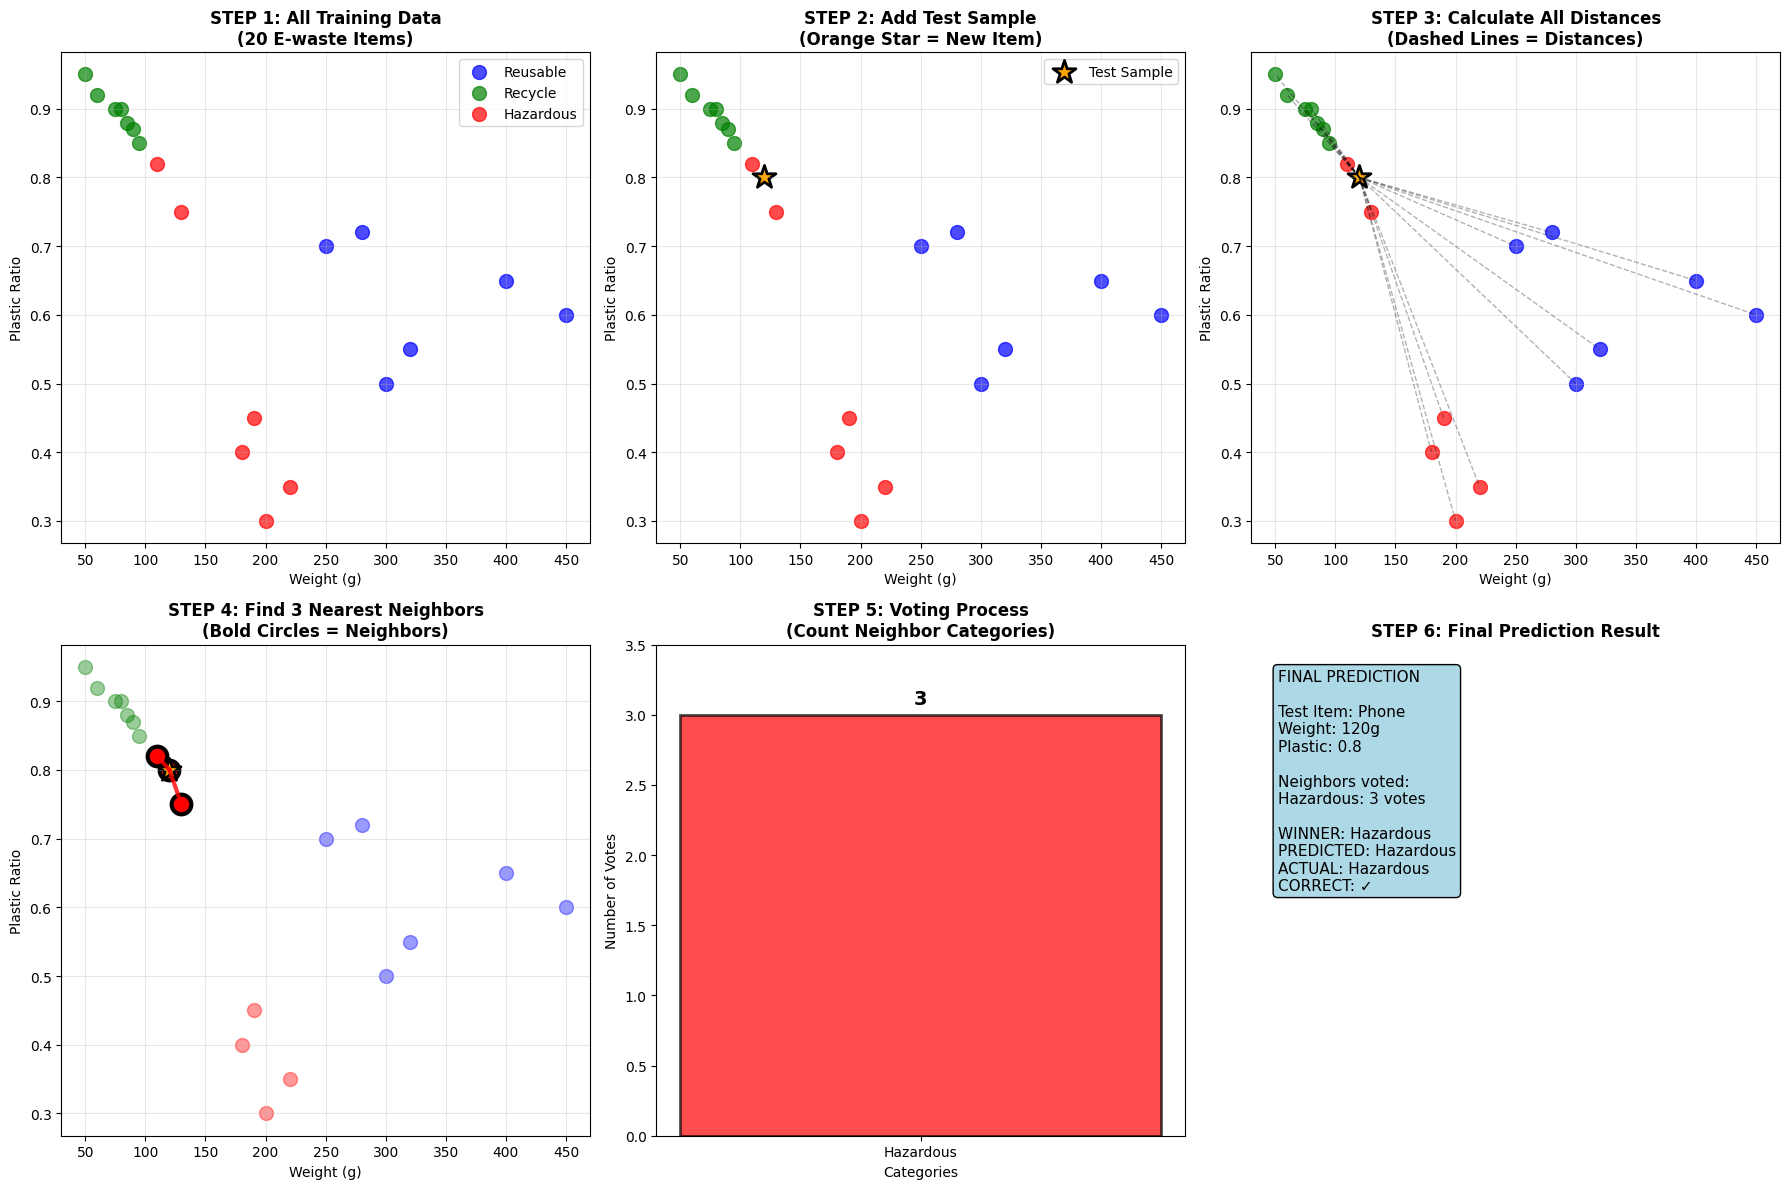


STEP-BY-STEP RESULTS:
----------------------------------------
1. Loaded 20 e-waste training samples
2. Test sample: Phone (Weight: 120g, Plastic: 0.8)
3. Calculated distances to all 19 training points
4. Found 3 nearest neighbors:
   Neighbor 1: Phone (Hazardous) - Distance: 0.0
   Neighbor 2: Phone (Hazardous) - Distance: 0.133
   Neighbor 3: Phone (Hazardous) - Distance: 0.263
5. Voting results:
   Hazardous: 3 votes
6. Final prediction: Hazardous
7. Actual category: Hazardous
8. Prediction correct: Yes

KNN STEP-BY-STEP COMPLETE!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

# Set random seed
np.random.seed(42)

print("="*60)
print("KNN E-WASTE CLASSIFICATION - STEP BY STEP")
print("="*60)

# Create 20 Real Dataset
data = {
    "Weight_g": [120, 450, 80, 200, 50, 300, 95, 180, 75, 250,
                 130, 400, 85, 220, 60, 320, 110, 190, 90, 280],
    "Plastic_Ratio": [0.8, 0.6, 0.9, 0.3, 0.95, 0.5, 0.85, 0.4, 0.9, 0.7,
                     0.75, 0.65, 0.88, 0.35, 0.92, 0.55, 0.82, 0.45, 0.87, 0.72],
    "Device_Type": ["Phone", "Tablet", "Charger", "Battery", "Plastic_Case", "Small_Device",
                   "Charger", "Phone", "Charger", "Tablet", "Phone", "Tablet",
                   "Charger", "Battery", "Plastic_Case", "Small_Device", "Phone",
                   "Battery", "Charger", "Tablet"],
    "Category": ["Hazardous", "Reusable", "Recycle", "Hazardous", "Recycle", "Reusable",
                "Recycle", "Hazardous", "Recycle", "Reusable", "Hazardous", "Reusable",
                "Recycle", "Hazardous", "Recycle", "Reusable", "Hazardous", "Hazardous",
                "Recycle", "Reusable"]
}

df = pd.DataFrame(data)

# Encode categorical data
le = LabelEncoder()
df_encoded = df.copy()
df_encoded["Device_Type"] = le.fit_transform(df["Device_Type"])

X = df_encoded[["Weight_g", "Plastic_Ratio", "Device_Type"]].values
y = df_encoded["Category"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Test sample (using index 0)
test_sample = X_scaled[0]
test_category = y[0]

print("DATASET (20 Records):")
print(df.to_string(index=False))

print("\nTEST SAMPLE: " + str(df.iloc[0]['Device_Type']) + " (" + str(df.iloc[0]['Weight_g']) + "g, " + str(df.iloc[0]['Plastic_Ratio']) + " plastic)")
print("ACTUAL CATEGORY: " + str(test_category))

# Get neighbors
distances, neighbor_indices = knn.kneighbors([test_sample], n_neighbors=3, return_distance=True)

print("\nKNN DISTANCE FORMULA:")
print("Distance = √[(x₁-x₂)² + (y₁-y₂)² + (z₁-z₂)²]")
print("Where: x=Weight, y=Plastic_Ratio, z=Device_Type")

# Step-by-Step Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Colors for categories
colors = {'Recycle': 'green', 'Hazardous': 'red', 'Reusable': 'blue'}

# Image 1: All Training Data
ax = axes[0]
plotted_labels = set()
for i, category in enumerate(y):
    if i != 0:  # Don't plot test sample yet
        label = category if category not in plotted_labels else ""
        if label:
            plotted_labels.add(category)
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7, label=label)

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 1: All Training Data\n(20 E-waste Items)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Image 2: Add Test Sample
ax = axes[1]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7)

# Add test sample
ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, label='Test Sample', edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 2: Add Test Sample\n(Orange Star = New Item)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Image 3: Calculate Distances to All Points
ax = axes[2]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7)
        # Draw distance lines
        ax.plot([X[0, 0], X[i, 0]], [X[0, 1], X[i, 1]], 'k--', alpha=0.3, linewidth=1)

ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 3: Calculate All Distances\n(Dashed Lines = Distances)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Image 4: Highlight 3 Nearest Neighbors
ax = axes[3]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.4)

# Highlight nearest neighbors
for neighbor_idx in neighbor_indices[0]:
    if neighbor_idx < len(X):
        ax.scatter(X[neighbor_idx, 0], X[neighbor_idx, 1], c=colors[y[neighbor_idx]],
                  s=200, edgecolor='black', linewidth=3)
        ax.plot([X[0, 0], X[neighbor_idx, 0]], [X[0, 1], X[neighbor_idx, 1]],
               'r-', linewidth=3, alpha=0.8)

ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 4: Find 3 Nearest Neighbors\n(Bold Circles = Neighbors)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Image 5: Show Voting Process
ax = axes[4]
neighbor_categories = [y[idx] for idx in neighbor_indices[0] if idx < len(y)]
vote_counts = {}
for cat in neighbor_categories:
    vote_counts[cat] = vote_counts.get(cat, 0) + 1

categories = list(vote_counts.keys())
votes = list(vote_counts.values())
bars = ax.bar(categories, votes, color=[colors[cat] for cat in categories], alpha=0.7, edgecolor='black', linewidth=2)

# Add vote numbers on bars
for bar, vote in zip(bars, votes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, str(vote),
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Votes')
ax.set_xlabel('Categories')
ax.set_title('STEP 5: Voting Process\n(Count Neighbor Categories)', fontsize=12, fontweight='bold')
if votes:
    ax.set_ylim(0, max(votes) + 0.5)

# Image 6: Final Prediction
ax = axes[5]
winner = max(vote_counts, key=vote_counts.get) if vote_counts else "Unknown"
prediction = knn.predict([test_sample])[0]

# Show final result
result_text = "FINAL PREDICTION\n\n"
result_text += "Test Item: " + str(df.iloc[0]['Device_Type']) + "\n"
result_text += "Weight: " + str(df.iloc[0]['Weight_g']) + "g\n"
result_text += "Plastic: " + str(df.iloc[0]['Plastic_Ratio']) + "\n\n"
result_text += "Neighbors voted:\n"

for cat, vote_count in vote_counts.items():
    result_text += cat + ": " + str(vote_count) + " vote"
    if vote_count != 1:
        result_text += "s"
    result_text += "\n"

result_text += "\nWINNER: " + str(winner) + "\n"
result_text += "PREDICTED: " + str(prediction) + "\n"
result_text += "ACTUAL: " + str(test_category) + "\n"
if prediction == test_category:
    result_text += "CORRECT: ✓"
else:
    result_text += "CORRECT: ✗"

ax.text(0.05, 0.95, result_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('STEP 6: Final Prediction Result', fontsize=12, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nSTEP-BY-STEP RESULTS:")
print("-" * 40)
print("1. Loaded 20 e-waste training samples")
print("2. Test sample: " + str(df.iloc[0]['Device_Type']) + " (Weight: " + str(df.iloc[0]['Weight_g']) + "g, Plastic: " + str(df.iloc[0]['Plastic_Ratio']) + ")")
print("3. Calculated distances to all 19 training points")
print("4. Found 3 nearest neighbors:")

for i, neighbor_idx in enumerate(neighbor_indices[0]):
    if neighbor_idx < len(X):
        distance = distances[0][i]
        neighbor_cat = y[neighbor_idx]
        neighbor_device = df.iloc[neighbor_idx]['Device_Type']
        print("   Neighbor " + str(i+1) + ": " + str(neighbor_device) + " (" + str(neighbor_cat) + ") - Distance: " + str(round(distance, 3)))

print("5. Voting results:")
for cat, vote_count in vote_counts.items():
    vote_word = "vote" if vote_count == 1 else "votes"
    print("   " + str(cat) + ": " + str(vote_count) + " " + vote_word)

print("6. Final prediction: " + str(prediction))
print("7. Actual category: " + str(test_category))
if prediction == test_category:
    print("8. Prediction correct: Yes")
else:
    print("8. Prediction correct: No")

print("\n" + "="*60)
print("KNN STEP-BY-STEP COMPLETE!")
print("="*60)

KNN E-WASTE CLASSIFICATION - STEP BY STEP
DATASET (20 Records):
 Weight_g  Plastic_Ratio  Device_Type  Category
      120           0.80        Phone Hazardous
      450           0.60       Tablet  Reusable
       80           0.90      Charger   Recycle
      200           0.30      Battery Hazardous
       50           0.95 Plastic_Case   Recycle
      300           0.50 Small_Device  Reusable
       95           0.85      Charger   Recycle
      180           0.40        Phone Hazardous
       75           0.90      Charger   Recycle
      250           0.70       Tablet  Reusable
      130           0.75        Phone Hazardous
      400           0.65       Tablet  Reusable
       85           0.88      Charger   Recycle
      220           0.35      Battery Hazardous
       60           0.92 Plastic_Case   Recycle
      320           0.55 Small_Device  Reusable
      110           0.82        Phone Hazardous
      190           0.45      Battery Hazardous
       90           0.87

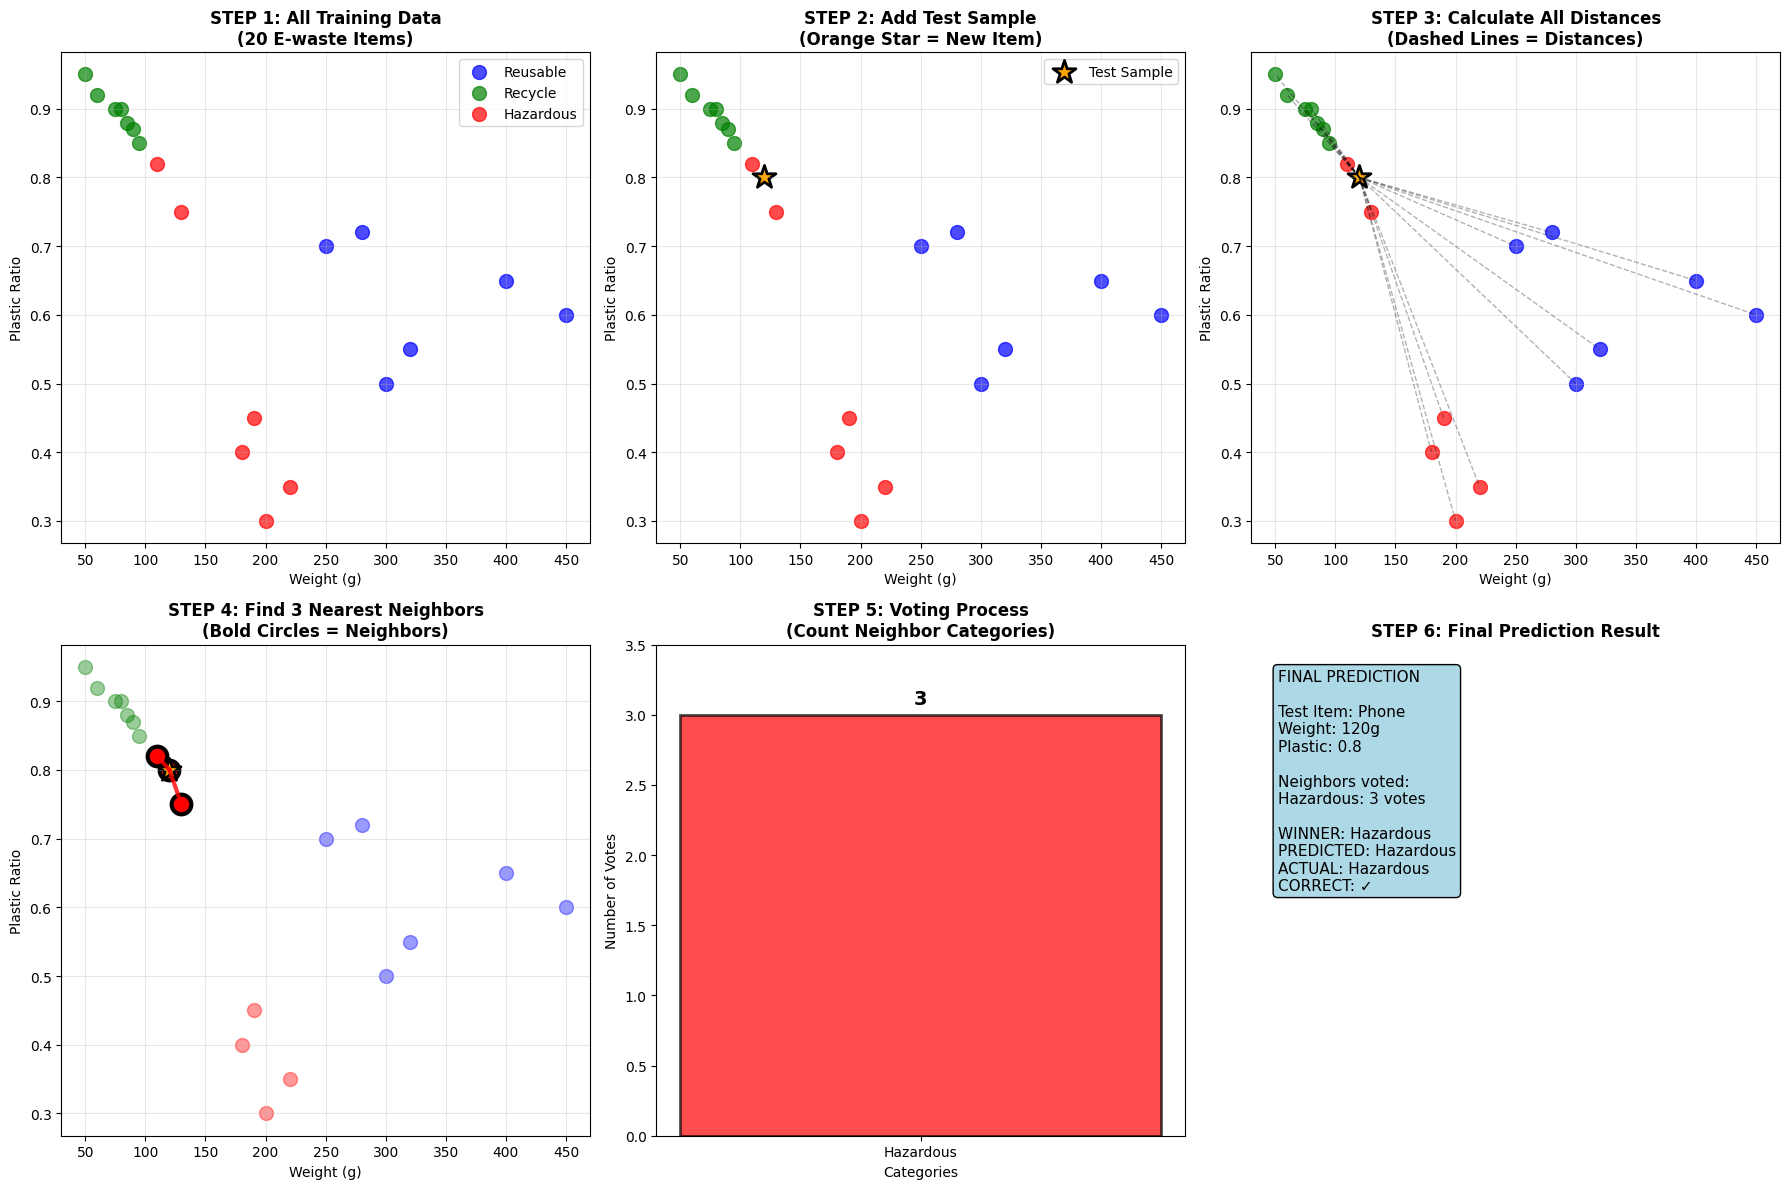


STEP-BY-STEP RESULTS:
----------------------------------------
1. Loaded 20 e-waste training samples
2. Test sample: Phone (Weight: 120g, Plastic: 0.8)
3. Calculated distances to all 19 training points
4. Found 3 nearest neighbors:
   Neighbor 1: Phone (Hazardous) - Distance: 0.0
   Neighbor 2: Phone (Hazardous) - Distance: 0.133
   Neighbor 3: Phone (Hazardous) - Distance: 0.263
5. Voting results:
   Hazardous: 3 votes
6. Final prediction: Hazardous
7. Actual category: Hazardous
8. Prediction correct: Yes

KNN STEP-BY-STEP COMPLETE!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

# Set random seed
np.random.seed(42)

print("="*60)
print("KNN E-WASTE CLASSIFICATION - STEP BY STEP")
print("="*60)

# Create 20 Real Dataset
data = {
    "Weight_g": [120, 450, 80, 200, 50, 300, 95, 180, 75, 250,
                 130, 400, 85, 220, 60, 320, 110, 190, 90, 280],
    "Plastic_Ratio": [0.8, 0.6, 0.9, 0.3, 0.95, 0.5, 0.85, 0.4, 0.9, 0.7,
                     0.75, 0.65, 0.88, 0.35, 0.92, 0.55, 0.82, 0.45, 0.87, 0.72],
    "Device_Type": ["Phone", "Tablet", "Charger", "Battery", "Plastic_Case", "Small_Device",
                   "Charger", "Phone", "Charger", "Tablet", "Phone", "Tablet",
                   "Charger", "Battery", "Plastic_Case", "Small_Device", "Phone",
                   "Battery", "Charger", "Tablet"],
    "Category": ["Hazardous", "Reusable", "Recycle", "Hazardous", "Recycle", "Reusable",
                "Recycle", "Hazardous", "Recycle", "Reusable", "Hazardous", "Reusable",
                "Recycle", "Hazardous", "Recycle", "Reusable", "Hazardous", "Hazardous",
                "Recycle", "Reusable"]
}

df = pd.DataFrame(data)

# Encode categorical data
le = LabelEncoder()
df_encoded = df.copy()
df_encoded["Device_Type"] = le.fit_transform(df["Device_Type"])

X = df_encoded[["Weight_g", "Plastic_Ratio", "Device_Type"]].values
y = df_encoded["Category"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Test sample (using index 0)
test_sample = X_scaled[0]
test_category = y[0]

print("DATASET (20 Records):")
print(df.to_string(index=False))

print("\nTEST SAMPLE: " + str(df.iloc[0]['Device_Type']) + " (" + str(df.iloc[0]['Weight_g']) + "g, " + str(df.iloc[0]['Plastic_Ratio']) + " plastic)")
print("ACTUAL CATEGORY: " + str(test_category))

# Get neighbors
distances, neighbor_indices = knn.kneighbors([test_sample], n_neighbors=3, return_distance=True)

print("\nKNN DISTANCE FORMULA:")
print("Distance = √[(x₁-x₂)² + (y₁-y₂)² + (z₁-z₂)²]")
print("Where: x=Weight, y=Plastic_Ratio, z=Device_Type")

# Step-by-Step Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Colors for categories
colors = {'Recycle': 'green', 'Hazardous': 'red', 'Reusable': 'blue'}

# Image 1: All Training Data
ax = axes[0]
plotted_labels = set()
for i, category in enumerate(y):
    if i != 0:  # Don't plot test sample yet
        label = category if category not in plotted_labels else ""
        if label:
            plotted_labels.add(category)
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7, label=label)

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 1: All Training Data\n(20 E-waste Items)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Image 2: Add Test Sample
ax = axes[1]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7)

# Add test sample
ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, label='Test Sample', edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 2: Add Test Sample\n(Orange Star = New Item)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Image 3: Calculate Distances to All Points
ax = axes[2]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.7)
        # Draw distance lines
        ax.plot([X[0, 0], X[i, 0]], [X[0, 1], X[i, 1]], 'k--', alpha=0.3, linewidth=1)

ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 3: Calculate All Distances\n(Dashed Lines = Distances)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Image 4: Highlight 3 Nearest Neighbors
ax = axes[3]
for i, category in enumerate(y):
    if i != 0:
        ax.scatter(X[i, 0], X[i, 1], c=colors[category], s=100, alpha=0.4)

# Highlight nearest neighbors
for neighbor_idx in neighbor_indices[0]:
    if neighbor_idx < len(X):
        ax.scatter(X[neighbor_idx, 0], X[neighbor_idx, 1], c=colors[y[neighbor_idx]],
                  s=200, edgecolor='black', linewidth=3)
        ax.plot([X[0, 0], X[neighbor_idx, 0]], [X[0, 1], X[neighbor_idx, 1]],
               'r-', linewidth=3, alpha=0.8)

ax.scatter(X[0, 0], X[0, 1], c='orange', marker='*', s=300, edgecolor='black', linewidth=2)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Plastic Ratio')
ax.set_title('STEP 4: Find 3 Nearest Neighbors\n(Bold Circles = Neighbors)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Image 5: Show Voting Process
ax = axes[4]
neighbor_categories = [y[idx] for idx in neighbor_indices[0] if idx < len(y)]
vote_counts = {}
for cat in neighbor_categories:
    vote_counts[cat] = vote_counts.get(cat, 0) + 1

categories = list(vote_counts.keys())
votes = list(vote_counts.values())
bars = ax.bar(categories, votes, color=[colors[cat] for cat in categories], alpha=0.7, edgecolor='black', linewidth=2)

# Add vote numbers on bars
for bar, vote in zip(bars, votes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, str(vote),
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Votes')
ax.set_xlabel('Categories')
ax.set_title('STEP 5: Voting Process\n(Count Neighbor Categories)', fontsize=12, fontweight='bold')
if votes:
    ax.set_ylim(0, max(votes) + 0.5)

# Image 6: Final Prediction
ax = axes[5]
winner = max(vote_counts, key=vote_counts.get) if vote_counts else "Unknown"
prediction = knn.predict([test_sample])[0]

# Show final result
result_text = "FINAL PREDICTION\n\n"
result_text += "Test Item: " + str(df.iloc[0]['Device_Type']) + "\n"
result_text += "Weight: " + str(df.iloc[0]['Weight_g']) + "g\n"
result_text += "Plastic: " + str(df.iloc[0]['Plastic_Ratio']) + "\n\n"
result_text += "Neighbors voted:\n"

for cat, vote_count in vote_counts.items():
    result_text += cat + ": " + str(vote_count) + " vote"
    if vote_count != 1:
        result_text += "s"
    result_text += "\n"

result_text += "\nWINNER: " + str(winner) + "\n"
result_text += "PREDICTED: " + str(prediction) + "\n"
result_text += "ACTUAL: " + str(test_category) + "\n"
if prediction == test_category:
    result_text += "CORRECT: ✓"
else:
    result_text += "CORRECT: ✗"

ax.text(0.05, 0.95, result_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('STEP 6: Final Prediction Result', fontsize=12, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nSTEP-BY-STEP RESULTS:")
print("-" * 40)
print("1. Loaded 20 e-waste training samples")
print("2. Test sample: " + str(df.iloc[0]['Device_Type']) + " (Weight: " + str(df.iloc[0]['Weight_g']) + "g, Plastic: " + str(df.iloc[0]['Plastic_Ratio']) + ")")
print("3. Calculated distances to all 19 training points")
print("4. Found 3 nearest neighbors:")

for i, neighbor_idx in enumerate(neighbor_indices[0]):
    if neighbor_idx < len(X):
        distance = distances[0][i]
        neighbor_cat = y[neighbor_idx]
        neighbor_device = df.iloc[neighbor_idx]['Device_Type']
        print("   Neighbor " + str(i+1) + ": " + str(neighbor_device) + " (" + str(neighbor_cat) + ") - Distance: " + str(round(distance, 3)))

print("5. Voting results:")
for cat, vote_count in vote_counts.items():
    vote_word = "vote" if vote_count == 1 else "votes"
    print("   " + str(cat) + ": " + str(vote_count) + " " + vote_word)

print("6. Final prediction: " + str(prediction))
print("7. Actual category: " + str(test_category))
if prediction == test_category:
    print("8. Prediction correct: Yes")
else:
    print("8. Prediction correct: No")

print("\n" + "="*60)
print("KNN STEP-BY-STEP COMPLETE!")
print("="*60)